**Evaluation Project 8 - Rainfall Prediction - Weather Forecasting**

**Problem Statement:**

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:


a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
print("\033[1m" + 'Number of rows in the given dataset:' + "\033[0m")
print(df.shape[0])

print("\033[1m" + 'Number of columns in the given dataset:'  + "\033[0m")
df.shape[1]

Number of rows in the given dataset:
8425
Number of columns in the given dataset:


23

In [5]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

**Number of columns: 23**


* **Date**  - The date of observation

* **Location**  -The common name of the location of the weather station

* **MinTemp**  -The minimum temperature in degrees celsius

* **MaxTemp** -The maximum temperature in degrees celsius

* **Rainfall**  -The amount of rainfall recorded for the day in mm

* **Evaporation**   -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

* **Sunshine**  -The number of hours of bright sunshine in the day.

* **WindGustDir**- The direction of the strongest wind gust in the 24 hours to midnight

* **WindGustSpeed** -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

* **WindDir9am** -Direction of the wind at 9am

* **WindDir3pm** -Direction of the wind at 3pm

* **WindSpeed9am** -Wind speed (km/hr) averaged over 10 minutes prior to 9am

* **WindSpeed3pm** -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

* **Humidity9am** -Humidity (percent) at 9am

* **Humidity3pm** -Humidity (percent) at 3pm

* **Pressure9am** -Atmospheric pressure (hpa) reduced to mean sea level at 9am

* **Pressure3pm** -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

* **Cloud9am** - Fraction of sky obscured by cloud at 9am. 

* **Cloud3pm** -Fraction of sky obscured by cloud 

* **Temp9am**-Temperature (degrees C) at 9am

* **Temp3pm** -Temperature (degrees C) at 3pm

* **RainToday** -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

* **RainTomorrow** -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

In [6]:
# Checking missing values in the dataset
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

**Lot of missing values in the dataset**

**Imputation of missing values** require some analysis of data types, outlier detection to see what strategy should be used for filling the null values

In [ ]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

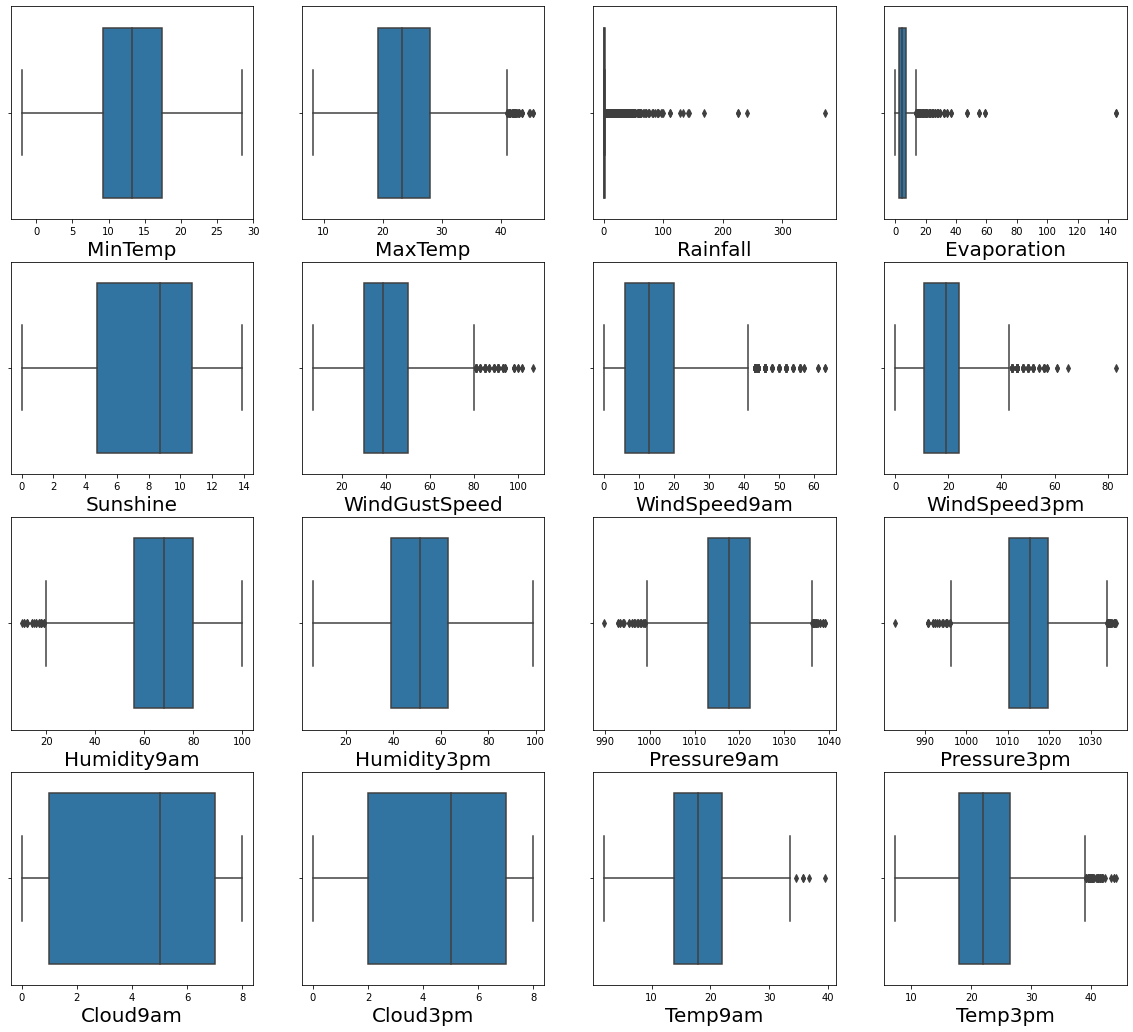

In [5]:
# Checking Outliers in numerical variables 
num=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
      'Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm', 'Cloud9am',
      'Cloud3pm', 'Temp9am','Temp3pm']
plotnumber = 1
plt.figure(figsize=(20,18))
for i in num:
  if plotnumber<=16:
    ax = plt.subplot(4,4,plotnumber)
    sns.boxplot(df[i])
    plt.xlabel(i,fontsize=20)
  plotnumber+=1
plt.show()



**Outliers present in the following variable:**

* MaxTemp
* Rainfall
* Evaporation
* WindGustSpeed
* WindSpeed9am
* WindSpeed3pm
* Humidity9am
* Pressur9am
* Pressure3pm
* Temp9am
* Temp3pm

In [6]:
# Imputation of missing values of numerical variables having outliers with median
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].median())

df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].median())
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].median())
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].median())
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].median())
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].median())
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].median())
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].median())
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].median())
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].median())

In [7]:
# Imputation of numerical variables with mean (which don't have outliers)
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())

In [8]:
# Imputation of categorical variables using mode
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])


In [9]:
#Dropping missing values for RainTomorrow(target variable for classification task)
# Dropping missing values for Rainfall (target variable for regression task)
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

**No missing values now,good to go ahead**

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,8079.0,13.145127,5.412352,-2.0,9.200000,13.200000,17.3,28.5
MaxTemp,8079.0,23.853026,6.104768,8.2,19.300000,23.300000,28.0,45.5
Rainfall,8079.0,2.802451,10.485324,0.0,0.000000,0.000000,1.0,371.0
Evaporation,8079.0,5.085815,3.918693,0.0,4.000000,4.600000,5.2,145.0
Sunshine,8079.0,7.672996,2.808423,0.0,7.632205,7.632205,9.0,13.9
WindGustSpeed,8079.0,39.853819,13.759196,7.0,31.000000,39.000000,48.0,107.0
WindSpeed9am,8079.0,13.737096,10.133814,0.0,6.000000,13.000000,20.0,61.0
WindSpeed3pm,8079.0,18.422082,9.718371,0.0,11.000000,19.000000,24.0,83.0
Humidity9am,8079.0,67.744770,16.831247,10.0,56.000000,68.000000,80.0,100.0
Humidity3pm,8079.0,51.209801,18.364607,6.0,39.000000,51.000000,63.0,99.0


* As the count shows 8079 for all the numerical variables, it means no null values exist in the given dataset now.

* Mean minimum temperature exist as 13.14 deg celsius,whose min value and max value observed as -2 deg celsius and 28.5 deg celsius.

* Average max temperature observed as 23.85 deg celsius

* Maximum Rainfall observed in a day is 371mm

* 75% of Austrialian cities observed less than 1 mm rainfall in a day and outliers exist in the variable

* Max number of hours of bright sunshine in the day is 13.9 hours 

* Rest all values looks decent to proceed further

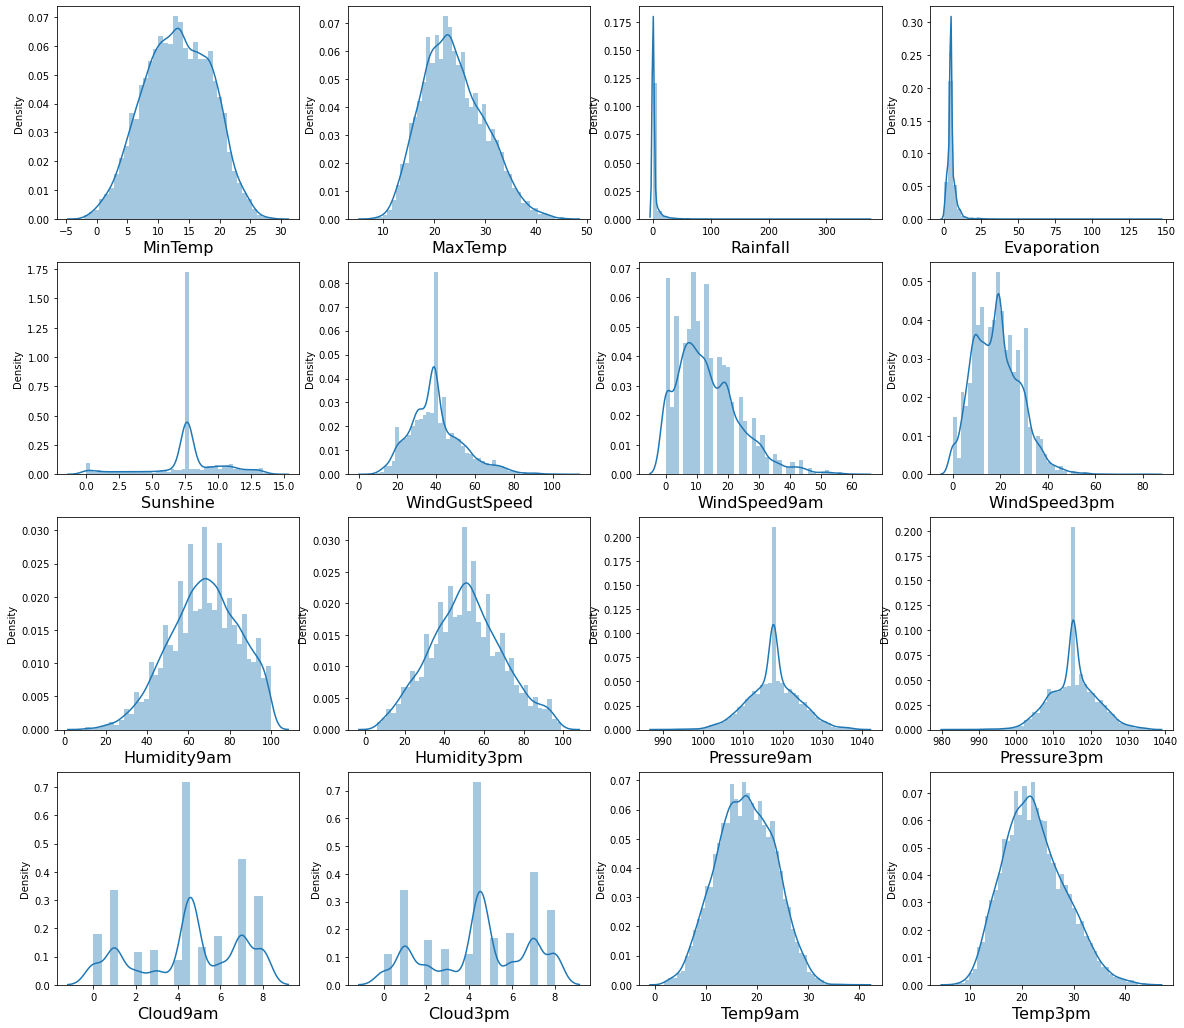

In [22]:
# Checking data distribution in numerical variables 

plotnumber = 1
plt.figure(figsize=(20,18))
for i in num:
  if plotnumber<=16:
    ax = plt.subplot(4,4,plotnumber)
    sns.distplot(df[i])
    plt.xlabel(i,fontsize=16)
  plotnumber+=1
plt.show()

* Rainfall and Evaporation has positively skewed data

* Min Temp and Max Temp data is uniformly or normally distributed

* Sunshine and WindGustSpeed clearly shows the presence of outliers

* WindSpeed9am and WindSpeed3pm has positively skewed data

* Pressure9am and Pressure3pm has outliers in the data

* Cloud and Temp data is more or less normally distributed

In [23]:
# Checking the skewness present in the dataset
df.skew()

MinTemp          -0.072774
MaxTemp           0.389964
Rainfall         13.073756
Evaporation      14.119349
Sunshine         -0.715801
WindGustSpeed     0.782055
WindSpeed9am      0.947171
WindSpeed3pm      0.504841
Humidity9am      -0.252043
Humidity3pm       0.119855
Pressure9am      -0.025082
Pressure3pm      -0.005234
Cloud9am         -0.349986
Cloud3pm         -0.267924
Temp9am          -0.010948
Temp3pm           0.403495
dtype: float64

**Skewness permissible limit is +/- 0.5**

Below Variables outside the permissible limit:

* *Rainfall*
* *Evaporation*
* *Sunshine*
* *WindGustSpeed*
* *WindSpeed9am*

Need to apply transformation technique to reduce skewness


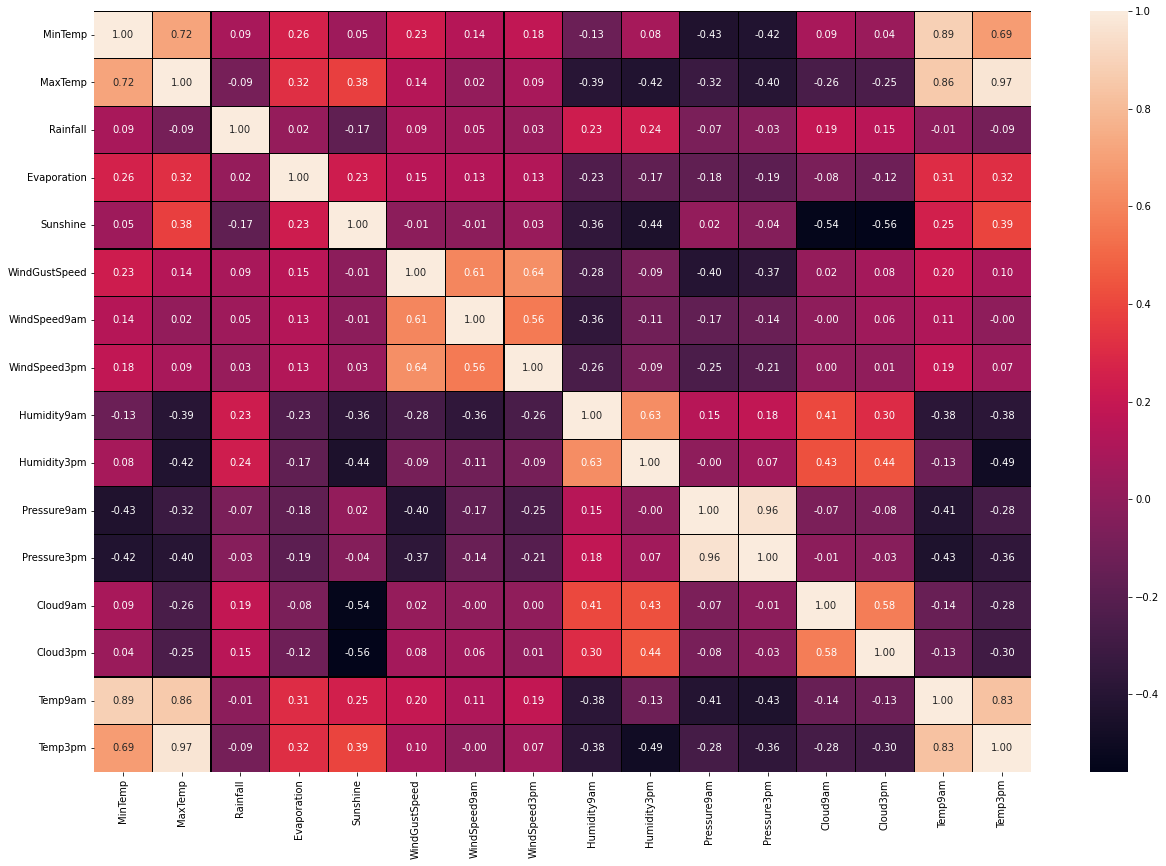

In [24]:
# Plotting heatmap and checking correlation

plt.figure(figsize=(21,14))
sns.heatmap(df.corr(),annot =True,linewidths=0.15,linecolor='black',fmt="0.2f")

* *MinTemp* has highly correlated with *Temp9am*

* *MaxTemp* has highly correlated with *Temp9am and Temp3pm*

* **Pressure9am and Pressure3pm** are highly correlated and hence we can drop one among them

* **Temp9am and Temp3pm** also shows high correlation and one of the variable can be dropped moving further

**Also to reduce the effect of multicollinearity, PCA can be applied moving further**

In [25]:
# Analysis of categorical variables
catg = ['Location', 'WindGustDir',  'WindDir9am', 'WindDir3pm',
        'RainToday', 'RainTomorrow']

In [26]:
for i in catg:
    print(i)
    print(df[i].value_counts())
    print("="*100)

Location
Melbourne       1442
PerthAirport    1204
Williamtown     1136
Albury           889
Newcastle        804
CoffsHarbour     609
Brisbane         569
Penrith          476
Wollongong       464
Darwin           250
Adelaide         198
Uluru             38
Name: Location, dtype: int64
WindGustDir
N      1619
E       550
SW      548
SSE     541
S       535
WNW     511
W       487
WSW     481
SE      469
ENE     397
SSW     381
NW      368
NE      346
NNE     335
ESE     298
NNW     213
Name: WindGustDir, dtype: int64
WindDir9am
N      1645
SW      676
NW      601
WSW     509
SE      491
WNW     462
SSW     451
ENE     426
NNE     417
W       396
NE      396
S       379
E       371
SSE     353
NNW     260
ESE     246
Name: WindDir9am, dtype: int64
WindDir3pm
SE     1076
S       679
SSE     600
WSW     559
NE      539
N       505
SW      473
WNW     467
NW      459
ESE     450
W       447
E       438
ENE     391
NNE     356
SSW     352
NNW     288
Name: WindDir3pm, dtype: int64
RainTo

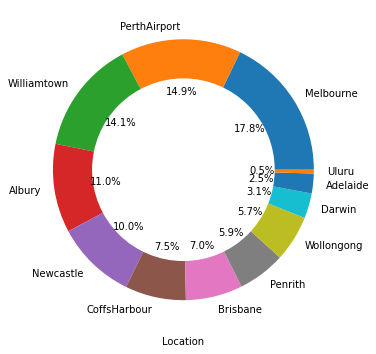

<Figure size 432x288 with 0 Axes>

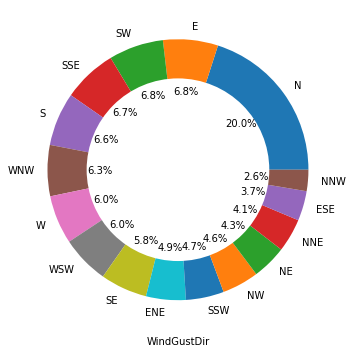

<Figure size 432x288 with 0 Axes>

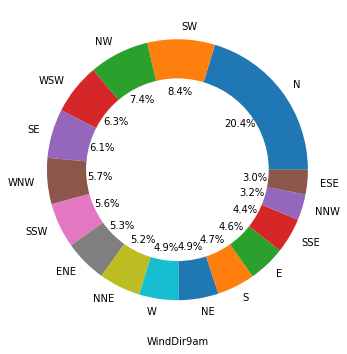

<Figure size 432x288 with 0 Axes>

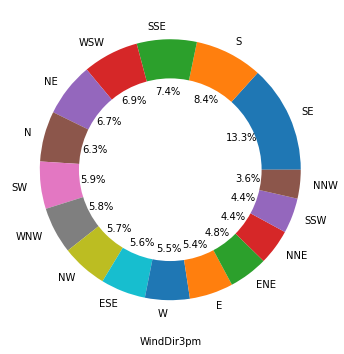

<Figure size 432x288 with 0 Axes>

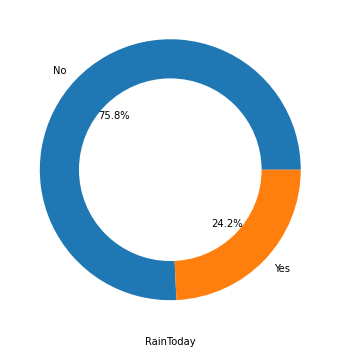

<Figure size 432x288 with 0 Axes>

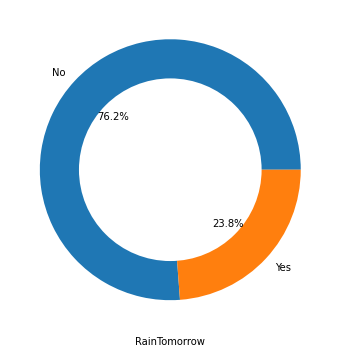

<Figure size 432x288 with 0 Axes>

In [27]:
for i in catg:
    plt.figure(figsize=(8,6))
    df[i].value_counts().plot.pie(autopct='%1.1f%%')
    centre=plt.Circle((0,0),0.7,fc='white')
    fig=plt.gcf()
    fig.gca().add_artist(centre)
    plt.xlabel(i)
    plt.ylabel('')
    plt.figure()

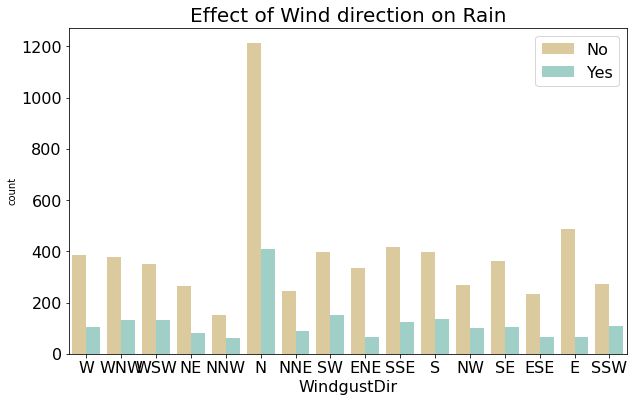

In [28]:
plt.figure(figsize=(10,6))
p = sns.countplot(df['WindGustDir'], hue=df['RainTomorrow'], palette='BrBG')
plt.title('Effect of Wind direction on Rain', fontsize=20)
p.set_xlabel('WindgustDir',fontsize=16)
plt.xticks(fontsize=16,rotation=0)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

**Maximum rainfall can be seen in the areas where the direction of strongest wind gust is in North direction in a day**

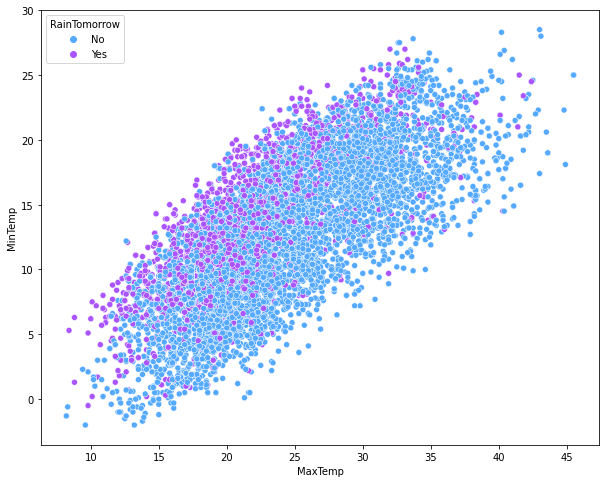

In [29]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='MaxTemp',y='MinTemp',hue='RainTomorrow',palette='cool',data=df)


  * As the Min temp is increasing Max Temp is also increasing, it is a linear relationship and dark circle is showing that it will get Rain tomorrow



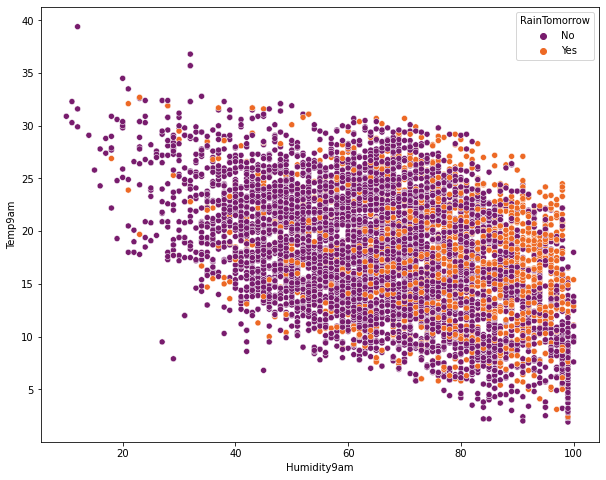

In [30]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Humidity9am',y='Temp9am',hue='RainTomorrow',palette='inferno',data=df)

As **humidity** is increasing there are chances of **raining tomorrow** and also linear relationship is seen between temperature and humidity

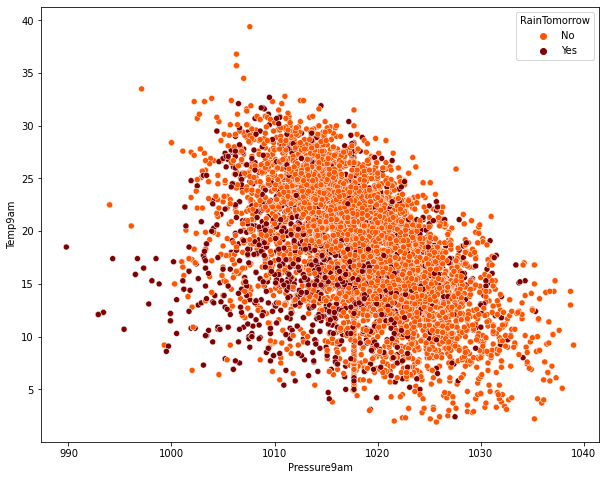

In [31]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Pressure9am',y='Temp9am',hue='RainTomorrow',palette='gist_heat_r',data=df)

In a **depression (low pressure)**, *air rises and cools*, water vapour condenses to form clouds and perhaps precipitation and hence we are seeing more rain in low pressure and temp zone

**ENCODING THE CATEGORICAL VARIABLES**

In [11]:
# Dropping the date and location columns which seems less important for our target prediction
df = df.drop(['Date','Location'],axis=1)

In [12]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,4.6,7.632205,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,No
1,7.4,25.1,0.0,4.6,7.632205,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,No
2,12.9,25.7,0.0,4.6,7.632205,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,No
3,9.2,28.0,0.0,4.6,7.632205,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,No
4,17.5,32.3,1.0,4.6,7.632205,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = le.fit_transform(df[i].values.reshape(-1,1))

In [36]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,4.6,7.632205,13,44.0,13,14,20.0,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0
1,7.4,25.1,0.0,4.6,7.632205,14,44.0,6,15,4.0,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0
2,12.9,25.7,0.0,4.6,7.632205,15,46.0,13,15,19.0,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0
3,9.2,28.0,0.0,4.6,7.632205,4,24.0,9,0,11.0,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0
4,17.5,32.3,1.0,4.6,7.632205,13,41.0,1,7,7.0,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0


**Outlier Removal**

In [15]:
# Removing outliers using zscore and keeping threshold as 3 (3 std from mean : 99.7% of data included)

from scipy.stats import zscore

z_score = np.abs(zscore(df))

filtering_entry = (z_score < 3).all(axis = 1)

df = df[filtering_entry]

In [38]:
df.shape

(7659, 21)

In [39]:
print("Data loss in % : ",(8079-7659)/8079*100)

Data loss in % :  5.1986632008911995


**Skewness Reduction**

In [16]:
# Considering skewness reduction through PowerTransformer

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [41]:
# Seperating features and target variable for classification task(Rain prediction)

X_clf = df.drop('RainTomorrow',axis=1)

y_clf = df['RainTomorrow']

In [42]:
# Applying Power transformer

X_new_pt = pt.fit_transform(X_clf)

# Converting numpy array(X_new_pt) into Dataframe and reassigning the values

X_clf = pd.DataFrame(X_new_pt,columns= X_clf.columns)

# Checking Skewness

X_clf.skew().sort_values(ascending=False)

RainToday        1.259585
Rainfall         1.011326
Evaporation      0.059720
WindGustSpeed    0.004792
Pressure9am     -0.000189
Pressure3pm     -0.000606
Temp3pm         -0.013049
MaxTemp         -0.014289
Humidity3pm     -0.037170
Temp9am         -0.056089
Sunshine        -0.057076
Humidity9am     -0.065666
WindSpeed3pm    -0.077273
MinTemp         -0.102529
WindSpeed9am    -0.113730
WindDir9am      -0.161443
WindGustDir     -0.190316
Cloud3pm        -0.223396
WindDir3pm      -0.246753
Cloud9am        -0.284731
dtype: float64

**RainToday** is a categorical variable and hence skewness is irrelevant for it

**Rainfall** still has skewness greater than permissible limit but it is our **target variable** for regression task so no need to worry about it

**BALANCING TARGET VARIABLE USING SMOTE(CLASSIFICATION TASK)**

In [43]:
from imblearn.over_sampling import SMOTE
from collections import Counter
over_smp = SMOTE(0.8)

In [44]:
print("The number of target classes before fit{}".format(Counter(y_clf)))

The number of target classes before fitCounter({0: 5899, 1: 1760})


In [45]:
X_clf,y_clf = over_smp.fit_resample(X_clf,y_clf)
print("The number of target classes after fit{}".format(Counter(y_clf)))

The number of target classes after fitCounter({0: 5899, 1: 4719})


**SCALING USING STANDARD SCALER**

In [46]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scaler = scaler.fit_transform(X_clf)

In [47]:
# Checking multicollinearity in the dataset
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaler,i) for i in range(X_clf.shape[1])]
vif['Features'] = X_clf.columns

vif

,vif,Features
0,9.150948,MinTemp
1,27.265529,MaxTemp
2,10.395090,Rainfall
3,1.585572,Evaporation
4,2.050718,Sunshine
5,1.555281,WindGustDir
6,2.172717,WindGustSpeed
7,1.373209,WindDir9am
8,1.478156,WindDir3pm
9,2.028299,WindSpeed9am


**Multicollinearity** exists in the dataset and hence need to apply PCA to reduce the effect of multicollinearity

**PRINCIPAL COMPONENT ANALYSIS**

In [48]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_scaler)

array([[ 0.43845931, -1.5896207 ,  2.05244774, ..., -0.27642338,
         0.03563472, -0.20276971],
       [ 1.34854968,  0.26481792,  1.97152276, ..., -0.13629709,
        -0.07083485,  0.07764142],
       [ 2.05413406, -0.67580139,  3.00794477, ..., -0.23608335,
         0.30377475, -0.0590942 ],
       ...,
       [-0.14834927, -2.70342668, -1.97805139, ..., -0.1732222 ,
         0.13689858,  0.10219502],
       [-2.98614636, -1.16349447,  0.780053  , ..., -0.01566011,
         0.02534011, -0.06715126],
       [-0.55828189,  0.78819026,  1.45097934, ...,  0.07721141,
        -0.02216514, -0.07992934]])

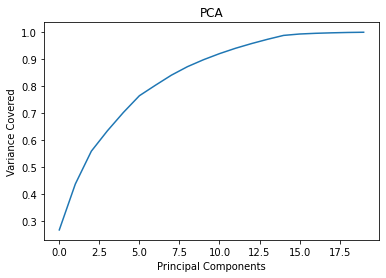

In [49]:
# Lets plot scree plot to check the best components

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

**Around 14 components** are able to explain **more than 95% variance** in the dataset and hence its safe to consider **14 PC's**

In [50]:
pca = PCA(n_components=14)
new_pcomp = pca.fit_transform(X_scaler)
princ_comp = pd.DataFrame(new_pcomp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14'])
princ_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,0.438459,-1.589621,2.052448,-1.187274,1.439811,-0.565360,-0.050523,-0.382673,0.999132,1.112511,-1.162454,0.476764,-0.528673,0.304039
1,1.348550,0.264818,1.971523,-1.086078,2.331950,-0.257583,0.066045,-1.471482,0.789675,0.468504,-0.028335,-0.590337,0.170342,-0.412863
2,2.054134,-0.675801,3.007945,-1.430145,1.377985,-0.890307,-0.716528,-0.301241,0.509719,0.023413,-0.482538,0.583897,0.162128,-0.060902
3,1.944787,1.917356,-0.482245,0.353179,0.552725,-0.139009,-0.930108,0.732165,2.652491,0.801836,0.227001,0.152363,-0.169798,-0.078966
4,1.346982,-1.809888,-0.945725,-0.072149,1.514168,-0.006403,0.226395,-1.784788,0.421596,1.694413,0.842194,-0.440055,-0.720777,-0.015381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10613,0.057148,-1.027529,-1.333038,-0.168753,-1.848062,2.235261,-0.206365,-0.418189,-2.056488,-0.217962,0.756373,0.562847,0.963648,-0.346285
10614,0.813906,-1.998120,2.208557,0.050115,-0.597494,-0.486557,-0.566991,-0.041521,-1.226019,0.784089,-1.580816,0.657309,0.414047,0.251023
10615,-0.148349,-2.703427,-1.978051,0.525692,-1.260241,0.275089,-1.716879,0.383037,1.140484,-0.034918,-0.694264,-0.640904,0.430348,0.241525
10616,-2.986146,-1.163494,0.780053,-0.958203,-0.528641,0.726661,0.025696,-1.573919,-0.620078,0.406803,0.205733,0.267424,0.154860,0.001117


**1. MODEL BUILDING - CLASSIFICATION TASK (RAIN TOMORROW PREDICTION)**

In [51]:
# Importing required libraries

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
import pickle
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV

**Function for calculating Model Performance**

In [52]:
# Defining function for calculating the performance of the classification model

def metric_score(clf,X_train,X_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(X_train)
        
        print("-----------------Train Result--------------------")
        
        print(f"Train Accuracy Score : {accuracy_score(y_train,y_pred)*100:.2f}%")
        
    elif train == False:
        
        pred = clf.predict(X_test)
        
        matrix = confusion_matrix(y_test,pred)
        
        print("-----------------Test Result--------------------")
        
        print("=====Confusion Matrix======= \n",matrix)
        
        print(f"Test Accuracy Score : {accuracy_score(y_test,pred)*100:.2f}%")
        
        print("\n Test Classification Report \n ", classification_report(y_test,pred,digits =2))

**Best Random State**

In [53]:
from sklearn.model_selection import train_test_split
maxAccu = 0 # Max Accuracy
maxRS = 0   # Best random state for which maximum accuracy is achieved

for i in range(0,100):
    X_train,X_test,y_train,y_test = train_test_split(princ_comp,y_clf,test_size=0.2,random_state=i)
  
    svc = SVC()
    
    svc.fit(X_train,y_train)    # Training the model
   
    pred_svc = svc.predict(X_test)    # Predicting the target variable
 
    acc_svc = accuracy_score(y_test,pred_svc)
  
    if acc_svc>maxAccu:
    
        maxAccu = acc_svc
        
        maxRS = i
        
print("Maximum Accuracy:",maxAccu,"at random state ", maxRS)

Maximum Accuracy: 0.8408662900188324 at random state  20


**Train Test Split using best Random State**

In [54]:
X_train,X_test,y_train,y_test = train_test_split(princ_comp,y_clf,test_size=0.2,random_state=20)

**LOGISTIC REGRESSION**

In [55]:
lr = LogisticRegression()

lr.fit(X_train,y_train)

pred_lr = lr.predict(X_test)    # Predicted values

metric_score(lr,X_train,X_test,y_train,y_test,train=True)

metric_score(lr,X_train,X_test,y_train,y_test,train=False)

cr_lr = cross_val_score(lr,princ_comp,y_clf,cv=5)

print("Cross validation score of Logistic regression model :",cr_lr.mean()*100)

-----------------Train Result--------------------
Train Accuracy Score : 77.20%
-----------------Test Result--------------------
=====Confusion Matrix======= 
 [[953 229]
 [245 697]]
Test Accuracy Score : 77.68%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.80      0.81      0.80      1182
           1       0.75      0.74      0.75       942

    accuracy                           0.78      2124
   macro avg       0.77      0.77      0.77      2124
weighted avg       0.78      0.78      0.78      2124

Cross validation score of Logistic regression model : 75.17496915231175


**Tuning parameters for Logistic Regression**

In [ ]:
lr_params = {'penalty':['l1', 'l2'],
             'tol':[0.0001,0.001,0.01],
             'solver':['newton-cg', 'lbfgs', 'liblinear'],
             'multi_class':['auto', 'ovr', 'multinomial']}

grd_lr = GridSearchCV(lr,param_grid = lr_params, n_jobs =-1)

grd_lr.fit(X_train,y_train)

print("Best parameters : ",grd_lr.best_params_)

Best parameters :  {'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.01}


In [ ]:
lr = grd_lr.best_estimator_

lr.fit(X_train,y_train)

pred_lr = lr.predict(X_test)    # Predicted values

metric_score(lr,X_train,X_test,y_train,y_test,train=True)

metric_score(lr,X_train,X_test,y_train,y_test,train=False)

cr_lr = cross_val_score(lr,princ_comp,y_clf,cv=5)

print("Cross validation score of Logistic regression model :",cr_lr.mean()*100)

-----------------Train Result--------------------
Train Accuracy Score : 76.15%
-----------------Test Result--------------------
=====Confusion Matrix======= 
 [[1019  231]
 [ 273  697]]
Test Accuracy Score : 77.30%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.79      0.82      0.80      1250
           1       0.75      0.72      0.73       970

    accuracy                           0.77      2220
   macro avg       0.77      0.77      0.77      2220
weighted avg       0.77      0.77      0.77      2220

Cross validation score of Logistic regression model : 74.36239439078555


**KNN Classifier**

In [56]:
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

pred_knn = knn.predict(X_test)    # Predicted values

metric_score(knn,X_train,X_test,y_train,y_test,train=True)

metric_score(knn,X_train,X_test,y_train,y_test,train=False)

cr_knn = cross_val_score(knn,princ_comp,y_clf,cv=5)

print("Cross validation score of K Neighbors Classifier model :",cr_knn.mean()*100)

-----------------Train Result--------------------
Train Accuracy Score : 90.50%
-----------------Test Result--------------------
=====Confusion Matrix======= 
 [[938 244]
 [ 51 891]]
Test Accuracy Score : 86.11%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.95      0.79      0.86      1182
           1       0.79      0.95      0.86       942

    accuracy                           0.86      2124
   macro avg       0.87      0.87      0.86      2124
weighted avg       0.88      0.86      0.86      2124

Cross validation score of K Neighbors Classifier model : 77.821589922231


**Tuning parameters of KNN Classifier**

In [57]:
 params_knn = { 'n_neighbors':[4,5],
        'weights':['uniform','distance'],
    'algorithm':['auto','ball_tree','brute'],
    'leaf_size':[25,30]}

grd_knn = GridSearchCV(knn,param_grid = params_knn, n_jobs =-1)

grd_knn.fit(X_train,y_train)

print("Best parameters : ",grd_knn.best_params_)

Best parameters :  {'algorithm': 'auto', 'leaf_size': 25, 'n_neighbors': 4, 'weights': 'distance'}


In [58]:
knn = grd_knn.best_estimator_

knn.fit(X_train,y_train)

pred_knn = knn.predict(X_test)    # Predicted values

metric_score(knn,X_train,X_test,y_train,y_test,train=True)

metric_score(knn,X_train,X_test,y_train,y_test,train=False)

cr_knn = cross_val_score(knn,princ_comp,y_clf,cv=5)

print("Cross validation score of K Neighbors Classifier model :",cr_knn.mean()*100)

-----------------Train Result--------------------
Train Accuracy Score : 100.00%
-----------------Test Result--------------------
=====Confusion Matrix======= 
 [[1030  152]
 [  31  911]]
Test Accuracy Score : 91.38%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.97      0.87      0.92      1182
           1       0.86      0.97      0.91       942

    accuracy                           0.91      2124
   macro avg       0.91      0.92      0.91      2124
weighted avg       0.92      0.91      0.91      2124

Cross validation score of K Neighbors Classifier model : 83.06707187799661


**Decision Tree Classifier**

In [59]:
dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)      # Model training

pred_dt = dt.predict(X_test)    # Predicted values

metric_score(dt,X_train,X_test,y_train,y_test,train=True)  # Training result

metric_score(dt,X_train,X_test,y_train,y_test,train=False)  # Test result

cr_dt = cross_val_score(dt,princ_comp,y_clf,cv=5)

print("Cross validation score of Decision Tree Classifier model :",cr_dt.mean()*100)

-----------------Train Result--------------------
Train Accuracy Score : 100.00%
-----------------Test Result--------------------
=====Confusion Matrix======= 
 [[1016  166]
 [ 125  817]]
Test Accuracy Score : 86.30%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.89      0.86      0.87      1182
           1       0.83      0.87      0.85       942

    accuracy                           0.86      2124
   macro avg       0.86      0.86      0.86      2124
weighted avg       0.86      0.86      0.86      2124

Cross validation score of Decision Tree Classifier model : 80.25094627667737


**Tuning Parameters for Decision Tree Classifier**

In [60]:
grid_param = {'criterion':['gini','entropy'],
              'max_depth': (10,15,20),
              'min_samples_leaf': range(3,7),
              'min_samples_split': range(2,6)
             }

grid_search = GridSearchCV(estimator = dt, param_grid = grid_param,n_jobs =-1)

grid_search.fit(X_train,y_train)

print("Best parameters : ",grid_search.best_params_)

Best parameters :  {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 4}


In [61]:
dt = grid_search.best_estimator_

dt.fit(X_train,y_train)      # Model training

pred_dt = dt.predict(X_test)    # Predicted values

metric_score(dt,X_train,X_test,y_train,y_test,train=True)  # Training result

metric_score(dt,X_train,X_test,y_train,y_test,train=False)  # Test result

cr_dt = cross_val_score(dt,princ_comp,y_clf,cv=5)

print("Cross validation score of Decision Tree Classifier model :",cr_dt.mean()*100)

-----------------Train Result--------------------
Train Accuracy Score : 97.30%
-----------------Test Result--------------------
=====Confusion Matrix======= 
 [[1005  177]
 [ 153  789]]
Test Accuracy Score : 84.46%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.87      0.85      0.86      1182
           1       0.82      0.84      0.83       942

    accuracy                           0.84      2124
   macro avg       0.84      0.84      0.84      2124
weighted avg       0.85      0.84      0.84      2124

Cross validation score of Decision Tree Classifier model : 79.55405020610957


**RANDOM FOREST CLASSIFIER**

In [62]:
rf = RandomForestClassifier()

rf.fit(X_train,y_train)      # Model training

pred_rf = rf.predict(X_test)    # Predicted values

metric_score(rf,X_train,X_test,y_train,y_test,train=True)  # Training result

metric_score(rf,X_train,X_test,y_train,y_test,train=False)  # Test result

cr_rf = cross_val_score(rf,princ_comp,y_clf,cv=5)

print("Cross validation score of Random Forest Classifier model :",cr_rf.mean()*100)

-----------------Train Result--------------------
Train Accuracy Score : 100.00%
-----------------Test Result--------------------
=====Confusion Matrix======= 
 [[1098   84]
 [  85  857]]
Test Accuracy Score : 92.04%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.93      0.93      0.93      1182
           1       0.91      0.91      0.91       942

    accuracy                           0.92      2124
   macro avg       0.92      0.92      0.92      2124
weighted avg       0.92      0.92      0.92      2124

Cross validation score of Random Forest Classifier model : 87.6725629882739


**Tuning parameters for Random Forest**

In [ ]:
params_rf = {'criterion':['gini','entropy'],
         'max_depth': [10,20,25,30],
         'min_samples_split' :[2,3,4],
         'min_samples_leaf' :[2,3,4,5]}

grd_rf = GridSearchCV(rf,param_grid = params_rf,n_jobs =-1)

grd_rf.fit(X_train,y_train)

print("Best parameters : ",grd_rf.best_params_)

Best parameters :  {'criterion': 'entropy', 'max_depth': 25, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [ ]:
rf = grd_rf.best_estimator_

rf.fit(X_train,y_train)

pred_rf = rf.predict(X_test)    # Predicted values

metric_score(rf,X_train,X_test,y_train,y_test,train=True)  # Training result

metric_score(rf,X_train,X_test,y_train,y_test,train=False)  # Test result

cr_rf = cross_val_score(rf,princ_comp,y_clf,cv=5)

print("Cross validation score of Random Forest Classifier model :",cr_rf.mean()*100)

-----------------Train Result--------------------
Train Accuracy Score : 99.90%
-----------------Test Result--------------------
=====Confusion Matrix======= 
 [[1166   84]
 [ 110  860]]
Test Accuracy Score : 91.26%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.91      0.93      0.92      1250
           1       0.91      0.89      0.90       970

    accuracy                           0.91      2220
   macro avg       0.91      0.91      0.91      2220
weighted avg       0.91      0.91      0.91      2220

Cross validation score of Random Forest Classifier model : 87.15953538035556


**Support Vector Classifier**

In [63]:
svc = SVC()

svc.fit(X_train,y_train)

pred_svc = svc.predict(X_test)    # Predicted values

metric_score(svc,X_train,X_test,y_train,y_test,train=True)

metric_score(svc,X_train,X_test,y_train,y_test,train=False)

cr_svc = cross_val_score(svc,princ_comp,y_clf,cv=5)

print("Cross validation score of Support Vector Classifier model :",cr_svc.mean()*100)

-----------------Train Result--------------------
Train Accuracy Score : 84.44%
-----------------Test Result--------------------
=====Confusion Matrix======= 
 [[1014  168]
 [ 170  772]]
Test Accuracy Score : 84.09%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.86      0.86      0.86      1182
           1       0.82      0.82      0.82       942

    accuracy                           0.84      2124
   macro avg       0.84      0.84      0.84      2124
weighted avg       0.84      0.84      0.84      2124

Cross validation score of Support Vector Classifier model : 76.13609529917599


**Tuning parameters for SVC**

In [64]:
svc_params = {'kernel':['rbf','linear','poly','sigmoid'],
              'gamma':['scale','auto'],
              'decision_function_shape':['ovr','ovo']
              }

grd_svc = GridSearchCV(svc,param_grid = svc_params,n_jobs =-1)

grd_svc.fit(X_train,y_train)

print("Best parameters : ",grd_svc.best_params_)

Best parameters :  {'decision_function_shape': 'ovr', 'gamma': 'auto', 'kernel': 'rbf'}


In [65]:
svc = grd_svc.best_estimator_

svc.fit(X_train,y_train)

pred_svc = svc.predict(X_test)    # Predicted values

metric_score(svc,X_train,X_test,y_train,y_test,train=True)

metric_score(svc,X_train,X_test,y_train,y_test,train=False)

cr_svc = cross_val_score(svc,princ_comp,y_clf,cv=5)

print("Cross validation score of Support Vector Classifier model :",cr_svc.mean()*100)

-----------------Train Result--------------------
Train Accuracy Score : 86.38%
-----------------Test Result--------------------
=====Confusion Matrix======= 
 [[1017  165]
 [ 153  789]]
Test Accuracy Score : 85.03%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.87      0.86      0.86      1182
           1       0.83      0.84      0.83       942

    accuracy                           0.85      2124
   macro avg       0.85      0.85      0.85      2124
weighted avg       0.85      0.85      0.85      2124

Cross validation score of Support Vector Classifier model : 77.00244741256421


**PLOTTING ROC AUC CURVE**

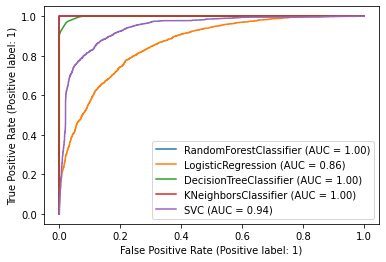

In [66]:
# Plotting ROC AUC curve on training data

disp = plot_roc_curve(rf,X_train,y_train)

plot_roc_curve(lr,X_train,y_train,ax=disp.ax_)

plot_roc_curve(dt,X_train,y_train,ax=disp.ax_)

plot_roc_curve(knn,X_train,y_train,ax=disp.ax_)

plot_roc_curve(svc,X_train,y_train,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')

plt.show()

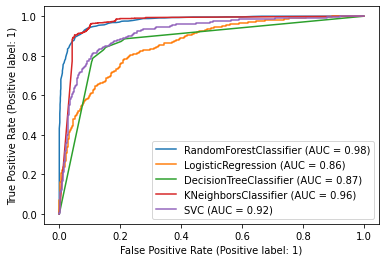

In [67]:
# Plotting ROC AUC curve on test data

disp = plot_roc_curve(rf,X_test,y_test)

plot_roc_curve(lr,X_test,y_test,ax=disp.ax_)

plot_roc_curve(dt,X_test,y_test,ax=disp.ax_)

plot_roc_curve(knn,X_test,y_test,ax=disp.ax_)

plot_roc_curve(svc,X_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')

plt.show()

**As per ROC AUC Curve, Random Forest Classifier is the best model due to maximum test accuracy**

But as far as difference between training and test accuracy is concerned, Logistic Regression seems to be the best model as it has no difference between training and testing accuracy

We will save the model using **Random Forest**

**Saving the model for Classification task**

In [68]:
filename = 'rain_prediction_clf.pkl'
pickle.dump(rf,open(filename,'wb'))

**CONCLUSION**

In [69]:
loaded_model = pickle.load(open('rain_prediction_clf.pkl','rb'))

pred_rf = loaded_model.predict(X_test)

result = accuracy_score(y_test,pred_rf)

print(result*100)

92.04331450094162


In [70]:
conclusion_clf = pd.DataFrame([pred_rf,y_test],index=['Predicted','Original'])

conclusion_clf

,0,1,2,3,4,5,6,7,8,9,...,2114,2115,2116,2117,2118,2119,2120,2121,2122,2123
Predicted,1,0,0,0,1,0,0,0,1,1,...,0,1,1,0,0,1,0,0,0,1
Original,1,0,0,0,0,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1


**2. MODEL BUILDING - REGRESSION TASK (RAINFALL FORECASTING)**

In [17]:
# Seperating features and target variable for Regression task(Rainfall forecastig)

X_reg = df.drop('Rainfall',axis=1)

y_reg = df['Rainfall']

In [18]:
# Applying Power transformer

X_new_ptr = pt.fit_transform(X_reg)

# Converting numpy array(X_new_ptr) into Dataframe and reassigning the values

X_reg = pd.DataFrame(X_new_ptr,columns= X_reg.columns)

# Checking Skewness

X_reg.skew().sort_values(ascending=False)

RainTomorrow     1.284798
RainToday        1.259585
Evaporation      0.059720
WindGustSpeed    0.004792
Pressure9am     -0.000189
Pressure3pm     -0.000606
Temp3pm         -0.013049
MaxTemp         -0.014289
Humidity3pm     -0.037170
Temp9am         -0.056089
Sunshine        -0.057076
Humidity9am     -0.065666
WindSpeed3pm    -0.077273
MinTemp         -0.102529
WindSpeed9am    -0.113730
WindDir9am      -0.161443
WindGustDir     -0.190316
Cloud3pm        -0.223396
WindDir3pm      -0.246753
Cloud9am        -0.284731
dtype: float64

**RainToday and RainTomorrow** is a categorical variable and skewness is not relevant for it

**Scaling using Satndard Scaler**

In [19]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scaled = scaler.fit_transform(X_reg)

In [20]:
# Checking multicollinearity in the dataset
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled,i) for i in range(X_reg.shape[1])]
vif['Features'] = X_reg.columns

vif

,vif,Features
0,8.429936,MinTemp
1,27.290002,MaxTemp
2,1.594059,Evaporation
3,2.136676,Sunshine
4,1.598004,WindGustDir
5,2.260030,WindGustSpeed
6,1.340896,WindDir9am
7,1.473532,WindDir3pm
8,1.942748,WindSpeed9am
9,1.966216,WindSpeed3pm


**Multicollinearity exists in the dataset**

**We will apply PCA to reduce the effect of Multicollinearity**

In [22]:
from sklearn.decomposition import PCA
pca = PCA()

pca.fit_transform(X_scaled)

array([[ 0.63060368,  1.46800205, -2.07061139, ..., -0.35612313,
         0.09533731, -0.15704858],
       [ 1.05218983, -0.04670467, -1.78441759, ..., -0.11665417,
        -0.06429693,  0.07891249],
       [ 1.90025897,  0.7210939 , -2.8376947 , ..., -0.21592547,
         0.32479505, -0.05115819],
       ...,
       [-0.51021476, -2.66459979, -0.0201496 , ...,  0.23696913,
         0.07046798,  0.02958146],
       [ 0.09283794, -1.8195739 , -0.63355092, ...,  0.32481281,
        -0.03027272,  0.09756068],
       [ 0.70591598, -2.27338647, -0.20576652, ...,  0.12970983,
         0.17027449,  0.04754777]])

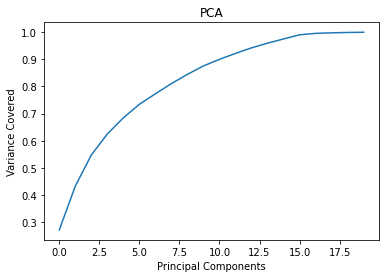

In [23]:
# Lets plot scree plot to check the best components

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

**14 components are able to explain more than 95% variance and hence considering 14 PC's**

In [24]:
pca = PCA(n_components=14)
new_pcomp = pca.fit_transform(X_scaled)
princ_comp = pd.DataFrame(new_pcomp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14'])
princ_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,0.630604,1.468002,-2.070611,-1.769763,0.417387,-1.429820,0.469439,-0.331596,-0.887630,-0.164995,0.590574,0.962267,-0.656860,-0.826798
1,1.052190,-0.046705,-1.784418,-1.993519,1.355601,-1.619191,-0.246389,-0.718832,0.312690,0.375139,0.558462,0.296949,0.521407,0.301820
2,1.900259,0.721094,-2.837695,-1.971560,0.179855,-0.779100,0.794581,-0.329518,0.219931,0.052459,-0.029802,0.396860,-0.676555,0.278883
3,1.310773,-1.738190,0.687230,0.018953,0.213810,-1.204008,1.860570,0.353571,-0.640905,1.711916,1.057259,0.001037,-0.192701,-0.131717
4,1.506252,1.536673,0.936308,-0.831722,0.945478,-2.059617,-0.532951,-1.226823,-0.315645,-0.482030,1.454723,-0.693096,0.518891,-0.728013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7654,-0.694809,-2.801173,0.446412,2.466186,1.021492,-0.912884,0.373576,0.271460,-0.846405,1.091982,0.547394,0.157025,-0.214004,-0.177363
7655,-0.512117,-2.795950,0.075348,1.607709,0.315138,-0.875278,1.141372,0.683370,-0.898971,1.606996,0.417137,0.943703,0.144901,-0.187446
7656,-0.510215,-2.664600,-0.020150,0.087667,-0.151014,-1.122358,0.901334,0.382862,-0.523991,1.529518,1.068240,0.085957,-0.258819,-0.324072
7657,0.092838,-1.819574,-0.633551,-0.642466,0.235094,-1.349870,-0.274610,-0.208591,-0.072120,1.449320,-0.617388,1.357097,0.196483,-0.368610


In [25]:
# Importing required libraries

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
import pickle
from sklearn import metrics
from sklearn.model_selection import cross_val_score

**Best Random State**

In [26]:
maxR2score = 0 # Max R2 score
maxRS = 0   # Best random state for which maximum r2 score is achieved

for i in range(1,1000):
    X_train,X_test,y_train,y_test = train_test_split(princ_comp,y_reg,test_size=0.2,random_state=i)
    
    knn = KNeighborsRegressor()
    
    knn.fit(X_train,y_train)
    
    pred_knn = knn.predict(X_test)
   
    score_knn = r2_score(y_test,pred_knn)
     
    
    if score_knn>maxR2score:
   
        maxR2score = score_knn
              
        maxRS = i
print("Maximum R2 Score:",maxR2score,"at random state ", maxRS)

Maximum R2 Score: 0.5753450197739932 at random state  237


**Train Test Split using Best Random State**

In [27]:
X_train,X_test,y_train,y_test = train_test_split(princ_comp,y_reg,test_size=0.2,random_state=237)

**LINEAR REGRESSION**

In [81]:
lr = LinearRegression()

lr.fit(X_train,y_train)

pred_train = lr.predict(X_train)

pred_test = lr.predict(X_test)

score_train = r2_score(y_train,pred_train)

score_test = r2_score(y_test,pred_test)

print("Training accuracy:",score_train*100)

print("Testing accuracy:",score_test*100)

cv_score = cross_val_score(lr,princ_comp,y_reg,cv=5)

cv_mean = cv_score.mean()

print(f"At cross fold 5, the cv score is {cv_mean} and accuracy score for training is {score_train} and accuracy for testing is {score_test}")

# MSE - ignoring some outliers means larger errors are punished. Hard to interpretate but most popular

mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error:",rmse)

Training accuracy: 48.80377289975768
Testing accuracy: 51.97306133940809
At cross fold 5, the cv score is 0.4888757016712524 and accuracy score for training is 0.4880377289975768 and accuracy for testing is 0.5197306133940809
Root mean squared Error: 3.3425620629131836


**LASSO REGULARIZATION**

In [82]:
lasscv = LassoCV(alphas = None, max_iter = 1000, normalize = True)

lasscv.fit(X_train,y_train)

#Best alpha parameter
alpha = lasscv.alpha_

lasso_reg =Lasso(alpha)

lasso_reg.fit(X_train,y_train)

pred_test = lasso_reg.predict(X_test)

print(lasso_reg.score(X_test,y_test)*100)

51.97302871544252


**KNN REGRESSOR**

In [83]:
knn = KNeighborsRegressor()

knn.fit(X_train,y_train)

pred_train = knn.predict(X_train)       # Predicting training data with the model

acc_train = metrics.r2_score(y_train,pred_train)    # Training accuracy

print("=====K Neighbors Regressor=====")

print("R square score for training dataset for K Neighbors regressor: ", acc_train)

pred_test = knn.predict(X_test)       # Predicting test data with the model

acc_test = metrics.r2_score(y_test,pred_test)     # Testing accuracy

print("R square score for test dataset for K Neighbors Regressor: ", acc_test)

knn_score = cross_val_score(knn,princ_comp,y_reg,cv=5)

knn_m = knn_score.mean()

print("Cross val score for K Neighbors Regresor:",knn_m*100)


mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error:",rmse)

=====K Neighbors Regressor=====
R square score for training dataset for K Neighbors regressor:  0.6478828401766403
R square score for test dataset for K Neighbors Regressor:  0.5753450197739932
Cross val score for K Neighbors Regresor: 43.76150933593274
Root mean squared Error: 3.1430778515972277


**TUNING PARAMETERS FOR KNN REGRESSOR**

In [84]:
params_knn = {'n_neighbors':[4,5,6,7,8],
              'weights':['uniform','distance'],
              'algorithm':['auto','ball_tree', 'kd_tree', 'brute'],
              'n_jobs':[-1,1]
             }

grd_knn = GridSearchCV(knn,params_knn)

grd_knn.fit(X_train,y_train)

print(grd_knn.best_params_)

{'algorithm': 'auto', 'n_jobs': -1, 'n_neighbors': 8, 'weights': 'distance'}


In [85]:
knn = grd_knn.best_estimator_

knn.fit(X_train,y_train)

pred_train = knn.predict(X_train)       # Predicting training data with the model

acc_train = metrics.r2_score(y_train,pred_train)    # Training accuracy

print("R square score for training dataset for K Neighbors regressor after tuning: ", acc_train)

pred_test = knn.predict(X_test)       # Predicting test data with the model

acc_test = metrics.r2_score(y_test,pred_test)

print("R square score for test dataset for K Neighbors Regressor after tuning: ", acc_test)

knn_score = cross_val_score(knn,princ_comp,y_reg,cv=5)

knn_m = knn_score.mean()

print("Cross val score for K Neighbors Regresor after tuning:",knn_m*100)


mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for K Neighbors Regressor after tuning:",rmse)

R square score for training dataset for K Neighbors regressor after tuning:  1.0
R square score for test dataset for K Neighbors Regressor after tuning:  0.6837944317044009
Cross val score for K Neighbors Regresor after tuning: 53.424168622481695
Root mean squared Error for K Neighbors Regressor after tuning: 2.712200452959996


**RANDOM FOREST REGRESSOR**

In [28]:
rf = RandomForestRegressor()

rf.fit(X_train,y_train)

rf.score(X_train,y_train)

pred_train = rf.predict(X_train)

pred_test = rf.predict(X_test)

score_train = r2_score(y_train,pred_train)

score_test = r2_score(y_test,pred_test)

print("=====RANDOM FOREST REGRESSOR=====")

print("Training accuracy for Random Forest model:",score_train*100)

print("Testing accuracy for Random Forest model:",score_test*100)

cv_score = cross_val_score(rf,princ_comp,y_reg,cv=5)

cv_mean = cv_score.mean()

print(f"At cross fold 5, the cv score is {cv_mean*100} ")

# MSE - ignoring some outliers means larger errors are punished. Hard to interpretate but most popular

mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for Random Forest Regressor:",rmse)


=====RANDOM FOREST REGRESSOR=====
Training accuracy for Random Forest model: 94.40236819360287
Testing accuracy for Random Forest model: 67.52371639289348
At cross fold 5, the cv score is 53.216622204062304 
Root mean squared Error for Random Forest Regressor: 2.7486547323131294


**ADA BOOST REGRESSOR**

In [31]:
ada = AdaBoostRegressor()

ada.fit(X_train,y_train)

pred_train = ada.predict(X_train)       # Predicting training data with the model

acc_train = metrics.r2_score(y_train,pred_train)    # Training accuracy

print("=====ADA BOOST REGRESSOR=====")

print("R square score for training dataset for Ada Boost regressor: ", acc_train)

pred_test = ada.predict(X_test)       # Predicting test data with the model

acc_test = metrics.r2_score(y_test,pred_test)

print("R square score for test dataset for Ada Boost Regressor: ", acc_test)

ada_score = cross_val_score(ada,princ_comp,y_reg,cv=5)

ada_m = ada_score.mean()

print("Cross val score for Ada Boost Regresor:",ada_m*100)


mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for ada boost Regressor:",rmse)


=====ADA BOOST REGRESSOR=====
R square score for training dataset for Ada Boost regressor:  -0.02591494719378007
R square score for test dataset for Ada Boost Regressor:  -0.004805466813702086
Cross val score for Ada Boost Regresor: 10.107043165860444
Root mean squared Error for ada boost Regressor: 4.834794529639335


**Support Vector Regressor**

In [32]:
svr = SVR()

svr.fit(X_train,y_train)

pred_train = svr.predict(X_train)       # Predicting training data with the model

acc_train = metrics.r2_score(y_train,pred_train)    # Training accuracy

print("R square score for training dataset for SVR: ", acc_train)

pred_test = svr.predict(X_test)       # Predicting test data with the model

acc_test = metrics.r2_score(y_test,pred_test)

print("R square score for test dataset for SVR: ", acc_test)

svr_score = cross_val_score(svr,princ_comp,y_reg,cv=5)

svr_m = svr_score.mean()

print("Cross val score for SVR:",svr_m*100)


mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for SVR:",rmse)

R square score for training dataset for SVR:  0.43836973355089226
R square score for test dataset for SVR:  0.44016742794160757
Cross val score for SVR: 40.63599826595298
Root mean squared Error for SVR: 3.608827378322241


**XGradient Boosting Regressor**

In [35]:
from xgboost import XGBRegressor

xgb = XGBRegressor()

xgb.fit(X_train,y_train)

xgb.score(X_train,y_train)

pred_train = xgb.predict(X_train)

pred_test = xgb.predict(X_test)

score_train = r2_score(y_train,pred_train)

score_test = r2_score(y_test,pred_test)

print("=====XGradient Boosting REGRESSOR=====")

print("Training accuracy for XGradient Boost model:",score_train*100)

print("Testing accuracy for XGradient Boost model:",score_test*100)

cv_score = cross_val_score(xgb,X_scaled,y_reg,cv=5)

cv_mean = cv_score.mean()

print(f"At cross fold 5, the cv score is {cv_mean*100} ")

# MSE - ignoring some outliers means larger errors are punished. Hard to interpretate but most popular

mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for XGradient Boosting model:",rmse)

[11:48:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
=====XGradient Boosting REGRESSOR=====
Training accuracy for XGradient Boost model: 65.59194813500453
Testing accuracy for XGradient Boost model: 57.34612309216668
[11:48:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:48:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:48:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:48:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:48:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
At cross fold 5, the cv score is 52.534584100634284 
Root mean squared Err

**Tuning parameters for XGB**

In [37]:
import warnings
warnings.filterwarnings('ignore')
params_xgb = {'max_depth':[3,4,5,6],
              'learning_rate':(0.01,0.001,0.1),
              'min_child_weight':(0,1,2),
              'max_delta_step':(0,1,2)
              }

grd_xgb = GridSearchCV(xgb,params_xgb)

grd_xgb.fit(X_train,y_train)

print(grd_xgb.best_params_)

[12:22:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:22:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:22:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:22:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:22:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:22:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:22:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:22:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [38]:
xgb = grd_xgb.best_estimator_

xgb.fit(X_train,y_train)

xgb.score(X_train,y_train)

pred_train = xgb.predict(X_train)

pred_test = xgb.predict(X_test)

score_train = r2_score(y_train,pred_train)

score_test = r2_score(y_test,pred_test)

print("=====XGradient Boosting REGRESSOR=====")

print("Training accuracy for XGradient Boost model:",score_train*100)

print("Testing accuracy for XGradient Boost model:",score_test*100)

cv_score = cross_val_score(xgb,X_scaled,y_reg,cv=5)

cv_mean = cv_score.mean()

print(f"At cross fold 5, the cv score is {cv_mean*100} ")

# MSE - ignoring some outliers means larger errors are punished. Hard to interpretate but most popular

mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for XGradient Boosting model:",rmse)

[12:34:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
=====XGradient Boosting REGRESSOR=====
Training accuracy for XGradient Boost model: 92.48949866375933
Testing accuracy for XGradient Boost model: 66.76750361639921
[12:34:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:35:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:35:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:35:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:35:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
At cross fold 5, the cv score is 53.50179855026601 
Root mean squared Erro

**Among all the models, XGB seems to be best fit for the rainfall forecating regression task as there is minimum difference between training and test accuracy**

**Saving the model for Regression task(Rainfall_forecasting)**

In [40]:
import pickle
filename = 'Rainfall_forecasting_reg.pkl'
pickle.dump(xgb,open(filename,'wb'))

**Conclusion for Rainfall forecasting**

In [41]:
loaded_model = pickle.load(open('Rainfall_forecasting_reg.pkl','rb'))
result = loaded_model.score(X_test,y_test)
pred_test = loaded_model.predict(X_test)
print(result*100,'%')

[12:51:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
66.76750361639921 %


In [42]:
conclusion_rainfall = pd.DataFrame([loaded_model.predict(X_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion_rainfall

,0,1,2,3,4,5,6,7,8,9,...,1522,1523,1524,1525,1526,1527,1528,1529,1530,1531
Predicted,-0.010018,0.030435,0.004335,-0.038534,0.25069,-0.062997,0.063929,-0.0138,0.127907,0.005668,...,-0.019346,0.23672,0.075165,0.200119,0.413152,11.931503,3.889308,-0.094083,-0.074031,0.003129
Original,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.200000,0.2000,0.200000,0.200000,...,0.000000,0.00000,0.600000,0.000000,1.000000,5.800000,2.600000,0.000000,0.000000,0.000000
